In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image as grayscale
template_img = cv2.imread('source/template.jpg', cv2.IMREAD_GRAYSCALE)
test1_img = cv2.imread('source/test1.jpg', cv2.IMREAD_GRAYSCALE)
# test2_img = cv2.imread('source/test2.jpg', cv2.IMREAD_GRAYSCALE)


In [42]:
template_height, template_width = template_img.shape
test1_height, test1_width = test1_img.shape
scale_factor = template_width / test1_width

# Compute the new dimensions for test1_img
new_width = template_width
new_height = int(test1_height * scale_factor)

# Resize test1_img using the computed dimensions
test1_img = cv2.resize(test1_img, (new_width, new_height))

In [43]:
def showimg(image):
# Display the image using matplotlib
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

In [44]:
sift = cv2.SIFT_create()

In [45]:
# Detect keypoints and descriptors
keypoints_template, descriptors_template = sift.detectAndCompute(template_img, None)
keypoints_test1, descriptors_test1 = sift.detectAndCompute(test1_img, None)

In [46]:
# Use FLANN based matcher for feature matching
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [47]:
# Match descriptors between template and test1 image
matches_test1 = flann.knnMatch(descriptors_template, descriptors_test1, k=2)

In [48]:
# Apply ratio test to filter good matches
good_matches = []
# good_matches_test2 = []

for m, n in matches_test1:
    if m.distance < 0.75 * n.distance:
        good_matches .append(m)

Number of good matches for test1: 209


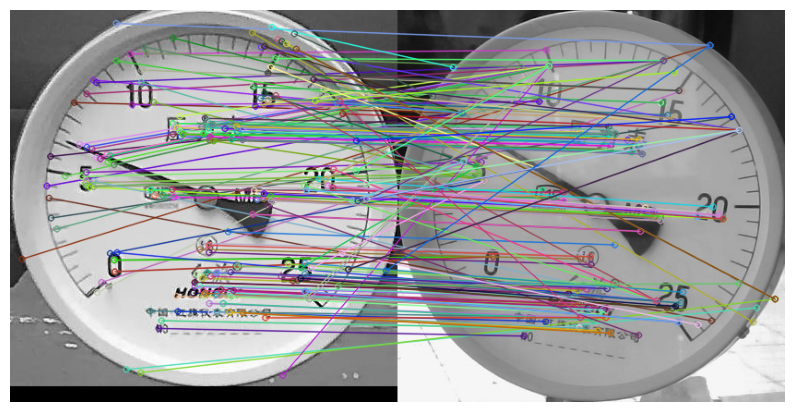

In [49]:
def draw_matches(template_img, test_img, keypoints_template, keypoints_test, good_matches):
    img_matches = cv2.drawMatches(template_img, keypoints_template, test_img, keypoints_test, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(10, 6))
    plt.imshow(img_matches)
    plt.axis('off')
    plt.show()

# Visualize the matches
print(f'Number of good matches for test1: {len(good_matches)}')
draw_matches(template_img, test1_img, keypoints_template, keypoints_test1, good_matches)

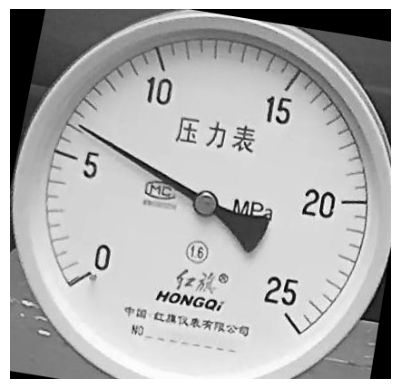

Homography Matrix:
[[ 9.73669022e-01 -1.98701008e-01  4.39822146e+01]
 [ 1.56796728e-01  9.85422501e-01 -2.43341705e+01]
 [-8.70587570e-06 -9.42113387e-05  1.00000000e+00]]


In [51]:
if len(good_matches) > 10:
    # Extract location of good matches
    src_pts = np.float32([keypoints_test1[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)
    dst_pts = np.float32([keypoints_template[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)

    # Compute the homography matrix
    H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Warp the test1 image to align with the template image
    height, width = template_img.shape
    aligned_img = cv2.warpPerspective(template_img, H, (width, height))

    # Display the aligned image
    plt.imshow(aligned_img, cmap='gray')
    plt.axis('off')
    plt.show()

    print("Homography Matrix:")
    print(H)
else:
    print("Not enough matches found to compute the homography matrix.")

In [ ]:
template_img_copy = template_img

center = (200, 200)  # Center of the circle (x, y)
radius = 100         # Radius of the circle
num_points = 30      # Number of points to form the circle

# Calculate the coordinates of the points on the circle
angle_step = 2 * np.pi / num_points
points = []
for i in range(num_points):
    angle = i * angle_step
    x = int(center[0] + radius * np.cos(angle))
    y = int(center[1] + radius * np.sin(angle))
    points.append((x, y))

# Draw points on the circle
for point in points:
    cv2.circle(template_img_copy , point, 3, (255, 255, 255), -1)  # Draw small white circles

# Display the image with the circle
plt.imshow(template_img_copy , cmap='gray')
plt.axis('off')
plt.show()